In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['catsanddogs', 'data123', 'data321', 'dogsandcats']


In [2]:
import os,re, random
import cv2
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
img_width = 64
img_height = 64
TRAIN_DIR_CATS = '../input/dogsandcats/catsanddogs/CatsandDogs/training/cats/'
TRAIN_DIR_DOGS='../input/dogsandcats/catsanddogs/CatsandDogs/training/dogs/'
TEST_DIR_CATS = '../input/dogsandcats/catsanddogs/CatsandDogs/testing/cats/'
TEST_DIR_DOGS = '../input/dogsandcats/catsanddogs/CatsandDogs/testing/dogs/'
train_images_cats = [TRAIN_DIR_CATS+i for i in os.listdir(TRAIN_DIR_CATS)] # use this for full dataset
train_images_dogs =[TRAIN_DIR_DOGS+i for i in os.listdir(TRAIN_DIR_DOGS)]
train_images_dogs_cats=train_images_cats+train_images_dogs


test_images_cats = [TEST_DIR_CATS+i for i in os.listdir(TEST_DIR_CATS)] # use this for full dataset
test_images_dogs =[TEST_DIR_DOGS+i for i in os.listdir(TEST_DIR_DOGS)]
test_images_dogs_cats=test_images_cats+test_images_dogs

len(train_images_dogs_cats)


20000

In [4]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [5]:
train_images_dogs_cats.sort(key=natural_keys)
test_images_dogs_cats.sort(key=natural_keys)


In [ ]:
print(train_images_dogs_cats[:])

In [6]:
def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'training/dogs' in i:
           
            y.append(1)
        elif 'training/cats' in i:
           
            y.append(0)
        #else:
            #print('neither cat nor dog name present in images')
            
    return x, y

In [7]:
X, Y = prepare_data(train_images_dogs_cats)
print(K.image_data_format())

channels_last


In [8]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.1, random_state=1)

In [ ]:
# plt.imshow(Y_train[978],cmap='gray')
print (Y_val[:])

In [9]:
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 50

In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [11]:
im_width=64
im_height=64
model = Sequential()
model.add(Conv2D(kernel_size=(3, 3),filters=9,
                 activation='relu',
                 input_shape=(im_width,im_height,3),padding="valid"))
model.add(Conv2D(kernel_size=(3, 3),filters=16,
                 activation='relu',padding="valid"))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3, 3),filters=32,
                 activation='relu',padding="valid"))
model.add(Conv2D(kernel_size=(5, 5),filters=64,
                 activation='relu',padding="valid"))
model.add(MaxPooling2D(pool_size=(3, 3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2, 2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [13]:
train_generator = train_datagen.flow(np.array(X_train), Y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(np.array(X_val), Y_val, batch_size=batch_size)

In [ ]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss\n",
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#filters changed, epochs changed, batch size set to 1
history = model.fit_generator(
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/80
360/360 [==============================] - 21s 59ms/step - loss: 0.6958 - acc: 0.5054 - val_loss: 0.7061 - val_acc: 0.4870
Epoch 2/80
360/360 [==============================] - 18s 50ms/step - loss: 0.6895 - acc: 0.5292 - val_loss: 0.6898 - val_acc: 0.5035
Epoch 3/80
360/360 [==============================] - 18s 51ms/step - loss: 0.6780 - acc: 0.5682 - val_loss: 0.6615 - val_acc: 0.5920
Epoch 4/80
360/360 [==============================] - 20s 55ms/step - loss: 0.6608 - acc: 0.6014 - val_loss: 0.6412 - val_acc: 0.6370
Epoch 5/80
360/360 [==============================] - 18s 50ms/step - loss: 0.6462 - acc: 0.6242 - val_loss: 0.6371 - val_acc: 0.6295
Epoch 6/80
360/360 [==============================] - 18s 51ms/step - loss: 0.6259 - acc: 0.6540 - val_loss: 0.5996 - val_acc: 0.6810
Epoch 7/80
360/360 [==============================] - 18s 50ms/step - loss: 0.6025 - acc: 0.6745 - val_loss: 0.5645 - val_acc: 0.7160
Epoch 8/80
360

Epoch 60/80
360/360 [==============================] - 20s 55ms/step - loss: 0.3081 - acc: 0.8687 - val_loss: 0.3525 - val_acc: 0.8500
Epoch 61/80
360/360 [==============================] - 19s 52ms/step - loss: 0.3100 - acc: 0.8660 - val_loss: 0.3540 - val_acc: 0.8465
Epoch 62/80
360/360 [==============================] - 18s 50ms/step - loss: 0.3043 - acc: 0.8652 - val_loss: 0.3714 - val_acc: 0.8455
Epoch 63/80
360/360 [==============================] - 18s 50ms/step - loss: 0.2968 - acc: 0.8727 - val_loss: 0.3626 - val_acc: 0.8480
Epoch 64/80
360/360 [==============================] - 20s 56ms/step - loss: 0.3020 - acc: 0.8701 - val_loss: 0.3597 - val_acc: 0.8510
Epoch 65/80
360/360 [==============================] - 19s 53ms/step - loss: 0.2993 - acc: 0.8716 - val_loss: 0.3595 - val_acc: 0.8505
Epoch 66/80
360/360 [==============================] - 18s 50ms/step - loss: 0.3003 - acc: 0.8709 - val_loss: 0.3743 - val_acc: 0.8465
Epoch 67/80
360/360 [==============================] - 

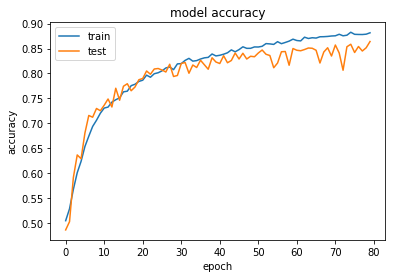

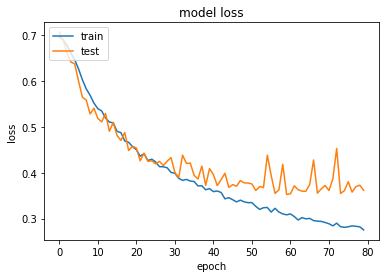

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss\n",
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()